In [7]:
from llama_cpp import Llama
# model_path: Path to the model.
# n_ctx: Maximum context size.
# n_parts: Number of parts to split the model into. If -1, the number of parts is automatically determined.
# seed: Random seed. -1 for random.
# f16_kv: Use half-precision for key/value cache.
# logits_all: Return logits for all tokens, not just the last token.
# vocab_only: Only load the vocabulary no weights.
# use_mmap: Use mmap if possible.
# use_mlock: Force the system to keep the model in RAM.
# embedding: Embedding mode only.
# n_threads: Number of threads to use. If None, the number of threads is automatically determined.
# n_batch: Maximum number of prompt tokens to batch together when calling llama_eval.
# last_n_tokens_size: Maximum number of tokens to keep in the last_n_tokens deque.
# lora_base: Optional path to base model, useful if using a quantized base model and you want to apply LoRA to an f16 model.
# lora_path: Path to a LoRA file to apply to the model.
# tensor_split: List of floats to split the model across multiple GPUs. If None, the model is not split.
# rope_freq_base: Base frequency for rope sampling.
# rope_freq_scale: Scale factor for rope sampling.
# verbose: Print verbose output to stderr.
llm = Llama(model_path="/home/catsmile/models/llama-2-7b-chat.ggmlv3.q8_0.bin", n_threads=4,n_gpu_layers=30,n_ctx=1024)

llama.cpp: loading model from /home/catsmile/models/llama-2-7b-chat.ggmlv3.q8_0.bin
llama_model_load_internal: format     = ggjt v3 (latest)
llama_model_load_internal: n_vocab    = 32000
llama_model_load_internal: n_ctx      = 1024
llama_model_load_internal: n_embd     = 4096
llama_model_load_internal: n_mult     = 256
llama_model_load_internal: n_head     = 32
llama_model_load_internal: n_head_kv  = 32
llama_model_load_internal: n_layer    = 32
llama_model_load_internal: n_rot      = 128
llama_model_load_internal: n_gqa      = 1
llama_model_load_internal: rnorm_eps  = 1.0e-06
llama_model_load_internal: n_ff       = 11008
llama_model_load_internal: freq_base  = 10000.0
llama_model_load_internal: freq_scale = 1
llama_model_load_internal: ftype      = 7 (mostly Q8_0)
llama_model_load_internal: model size = 7B
llama_model_load_internal: ggml ctx size =    0.08 MB
llama_model_load_internal: mem required  = 7162.73 MB (+  512.00 MB per state)
llama_new_context_with_model: kv self size  =  5

In [8]:
prompt = """
[INST] <<SYS>>
As an advanced language model, you can generate code as part of your responses. 
To make the code more noticeable and easier to read, please encapsulate it within triple backticks.
For instance, if you're providing Python code, wrap it as follows:

```python
print('hellow world')
```
<</SYS>>

{prompt} [/INST]
"""

def prompter(prompt):
    stream = llm.create_completion(prompt.format(prompt=prompt)
                                    , stream=True
                                    , repeat_penalty=1.1
                                    , max_tokens=0
                                    , stop=["USER:"
                                    , "ASSISTANT:"]
                                    , echo=False
                                    , temperature=0
                                    , mirostat_mode = 2
                                    , mirostat_tau=4.0
                                    , mirostat_eta=1.1)
    for output in stream:
        print(output['choices'][0]['text'],end="")

In [18]:
import pandas as pd
df = pd.read_csv("./data/data_pp.csv")

for col in ["course","mothers_occupation","fathers_occupation","scholarship_holder","result"]:
    df[col] = df[col].astype("category")

df.dtypes

student_id               int64
course                category
mothers_occupation    category
fathers_occupation    category
scholarship_holder    category
age_at_enrollment        int64
result                category
dtype: object

In [10]:
dtype = {}
for col in df.columns:
    if df[col].dtypes == "int64": 
        dtype[col] = "{min}~{max}".format(min=df[col].min(), max=df[col].max())
    elif df[col].dtypes == "category": 
        dtype[col] = list(df[col].cat.categories)
    else:
        print("skipping", col)

import json
print(json.dumps(dtype, indent=4))

{
    "student_id": "1~500",
    "course": [
        "Advertising and Marketing Management",
        "Agronomy",
        "Animation and Multimedia Design",
        "Basic Education",
        "Biofuel Production Technologies",
        "Communication Design",
        "Equinculture",
        "Informatics Engineering",
        "Journalism and Communication",
        "Management",
        "Management (evening attendance)",
        "Nursing",
        "Oral Hygiene",
        "Social Service",
        "Social Service (evening attendance)",
        "Tourism",
        "Veterinary Nursing"
    ],
    "mothers_occupation": [
        "(blank)",
        "Administrative staff",
        "Cleaning workers",
        "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
        "Health professionals",
        "Installation and Machine Operators and Assembly Workers",
        "Intermediate Level Technicians and Professions",
        "Intermediate level technicians from legal, social, sport

In [11]:
for k,v in dtype.items():
    print(k,":",v)

student_id : 1~500
course : ['Advertising and Marketing Management', 'Agronomy', 'Animation and Multimedia Design', 'Basic Education', 'Biofuel Production Technologies', 'Communication Design', 'Equinculture', 'Informatics Engineering', 'Journalism and Communication', 'Management', 'Management (evening attendance)', 'Nursing', 'Oral Hygiene', 'Social Service', 'Social Service (evening attendance)', 'Tourism', 'Veterinary Nursing']
mothers_occupation : ['(blank)', 'Administrative staff', 'Cleaning workers', 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 'Health professionals', 'Installation and Machine Operators and Assembly Workers', 'Intermediate Level Technicians and Professions', 'Intermediate level technicians from legal, social, sports, cultural and similar services', 'Other Situation', 'Personal Services, Security and Safety Workers and Sellers', 'Personal service workers', 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors

In [12]:
dtype_json = json.dumps(dtype)
prompter("""
With the METADATA of the dataset given, give me some visualization that I can create using the matlibplot python library. 
For referennce, each line contains the meta data of each column with the following format:
- number~number represents the min and max of a int64 column
- list represents a categorical column

METADATA:
student_id : 1~500
course : ['Advertising and Marketing Management', 'Agronomy', 'Animation and Multimedia Design', 'Basic Education', 'Biofuel Production Technologies', 'Communication Design', 'Equinculture', 'Informatics Engineering', 'Journalism and Communication', 'Management', 'Management (evening attendance)', 'Nursing', 'Oral Hygiene', 'Social Service', 'Social Service (evening attendance)', 'Tourism', 'Veterinary Nursing']
mothers_occupation : ['(blank)', 'Administrative staff', 'Cleaning workers', 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 'Health professionals', 'Installation and Machine Operators and Assembly Workers', 'Intermediate Level Technicians and Professions', 'Intermediate level technicians from legal, social, sports, cultural and similar services', 'Other Situation', 'Personal Services, Security and Safety Workers and Sellers', 'Personal service workers', 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 'Sellers', 'Skilled Workers in Industry, Construction and Craftsmen', 'Specialists in Intellectual and Scientific Activities', 'Student', 'Unskilled Workers', 'Workers in food processing, woodworking, clothing and other industries and crafts']
fathers_occupation : ['Administrative staff', 'Armed Forces Professions', 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry', 'Installation and Machine Operators and Assembly Workers', 'Intermediate Level Technicians and Professions', 'Other Situation', 'Other administrative support staff', 'Personal Services, Security and Safety Workers and Sellers', 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers', 'Sellers', 'Skilled Workers in Industry, Construction and Craftsmen', 'Skilled construction workers and the like, except electricians', 'Specialists in Intellectual and Scientific Activities', 'Student', 'Unskilled Workers', 'Unskilled workers in extractive industry, construction, manufacturing and transport']
scholarship_holder : ['no', 'yes']
age_at_enrollment : 18~60
result : ['Dropout', 'Enrolled', 'Graduate']
""".format(data=str(dtype)))


I would like to visualize the following:
1. Bar chart of the distribution of fathers occupation (matplotlib)
2. Pie chart of the distribution of mothers occupation (matplotlib)
3. Histogram of the distribution of age at enrollment (matplotlib)
4. Box plot of the distribution of scholarship holder (matplotlib)
5. Bar chart of the distribution of result (matplotlib)

Please let me know how to create these visualizations using matplotlib library in python.


llama_print_timings:        load time = 161677.73 ms
llama_print_timings:      sample time =    66.16 ms /   109 runs   (    0.61 ms per token,  1647.52 tokens per second)
llama_print_timings: prompt eval time = 209194.74 ms /   642 tokens (  325.85 ms per token,     3.07 tokens per second)
llama_print_timings:        eval time = 51572.72 ms /   108 runs   (  477.53 ms per token,     2.09 tokens per second)
llama_print_timings:       total time = 261388.88 ms


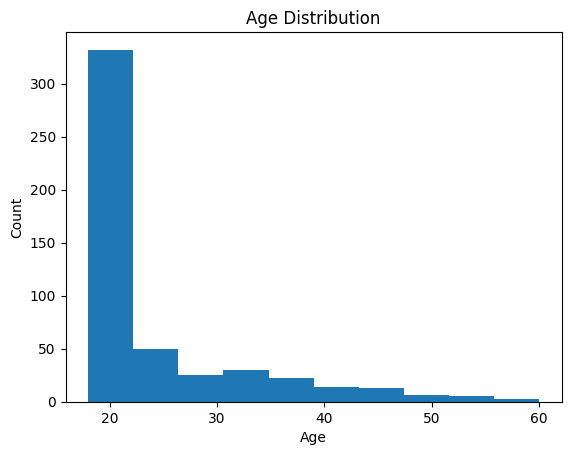

In [2]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.hist(df['age_at_enrollment'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

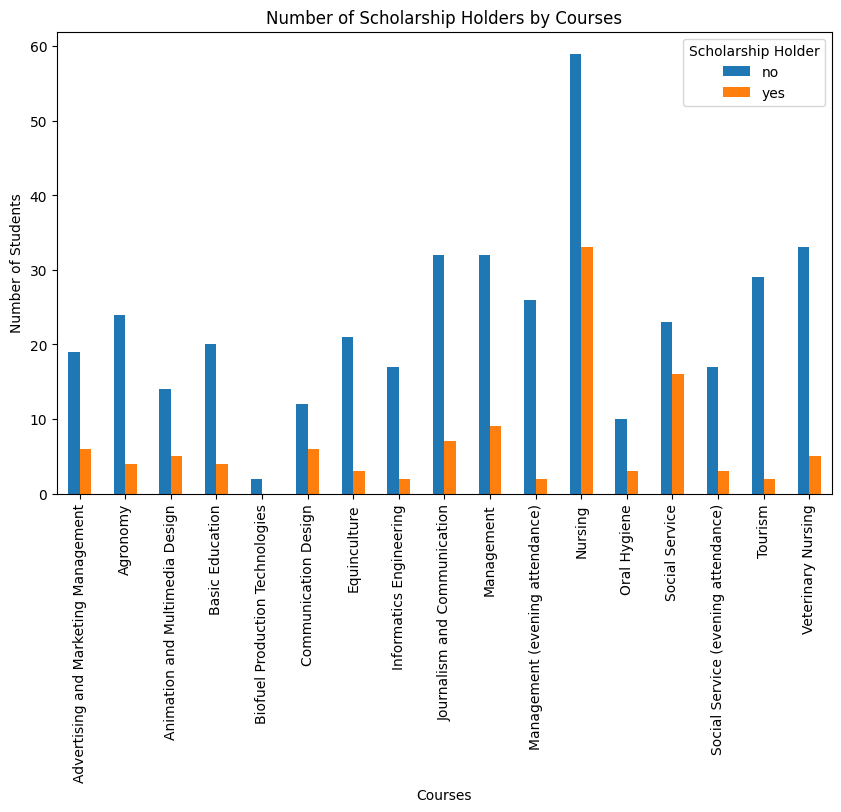

In [7]:
grouped_data = df.groupby(['course', 'scholarship_holder']).size().unstack()
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Courses')
plt.ylabel('Number of Students')
plt.title('Number of Scholarship Holders by Courses')
plt.xticks(rotation=90)
plt.legend(title='Scholarship Holder')
plt.show()



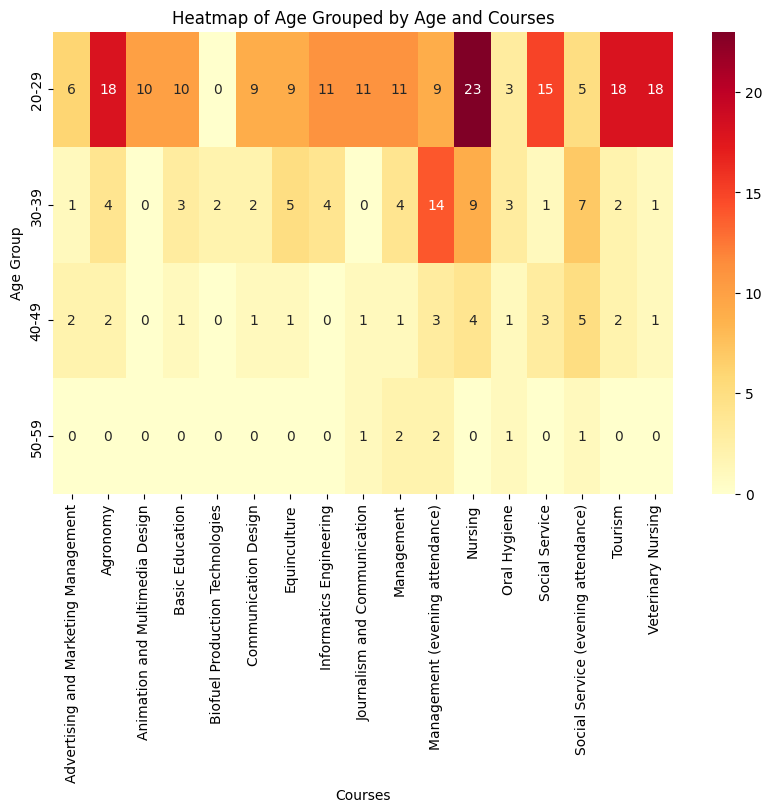

In [10]:
import seaborn as sns
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df['AgeGroup'] = pd.cut(df['age_at_enrollment'], bins=bins, labels=labels, right=False)

# Create a pivot table
pivot_table = pd.pivot_table(df, values='student_id', index='AgeGroup', columns='course', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.xlabel('Courses')
plt.ylabel('Age Group')
plt.title('Heatmap of Age Grouped by Age and Courses')
plt.xticks(rotation=90)
plt.show()

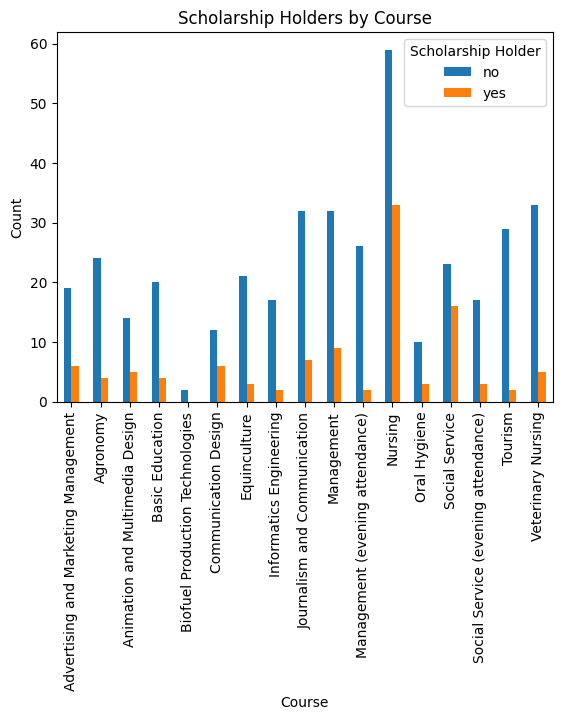

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your dataframe is named 'df'
grouped_data = df.groupby(['course', 'scholarship_holder']).size().unstack()

# Plotting the bar graph
grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Scholarship Holders by Course')
plt.legend(title='Scholarship Holder')
plt.show()
